# Explaining market value of players using SHAP

I am going to explain market predictions for two players Messi and Courtois. I still use fifa-23 dataset, but this time I base my prediction on one more variable - 'Club Position' to get better results. Models that I use are Random Forest Regressor and Catboost Regressor.

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


def read_dataset():
    return pd.read_csv("archive/fifa.csv")

def plot_feature_performance(X, y, y_pred, i):
    plt.scatter(X.iloc[:, i], y, color="green")
    plt.plot(X.iloc[:, i], y_pred, color="blue", linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()


def plot_bars(height, labels, num):
    arr = np.vstack([labels, height])
    ind = np.lexsort(arr)[::-1][:num]
    plt.bar(np.arange(num), arr[1, ind])
    plt.xticks(np.arange(num), arr[0, ind], rotation=-60, fontsize=10)
    plt.show()

In [22]:
from sklearn.model_selection import train_test_split
import shap

df = read_dataset()
y = df["Value(in Euro)"]

idx_1, idx_2 = 0, 6
name_1, name_2 = df["Known As"].iloc[idx_1],  df["Known As"].iloc[idx_2]

df = df[['Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'Club Position']]

scale_mapper = {"Low":1, "Medium":2, "High":3}
df["Attacking Work Rate"].replace(scale_mapper, inplace=True)
df["Defensive Work Rate"].replace(scale_mapper, inplace=True)

one_hot = pd.get_dummies(df['Club Position'])
df = df.drop('Club Position',axis = 1)
df = df.join(one_hot)

X100 = df.iloc[:100].copy()
X_train, X_test, y_train, y_test = train_test_split(df, y)

print("Names of players to explain predictions of their value: {}, {}".format(name_1, name_2))

Names of players to explain predictions of their value: L. Messi, T. Courtois


First model that I use is RandomForestRegressor. I have already used and shortly described in homework 1.

Coefficient of determination: 0.79


Permutation explainer: 101it [00:18,  2.59it/s]                         


Scatter plot: predictions vs truth


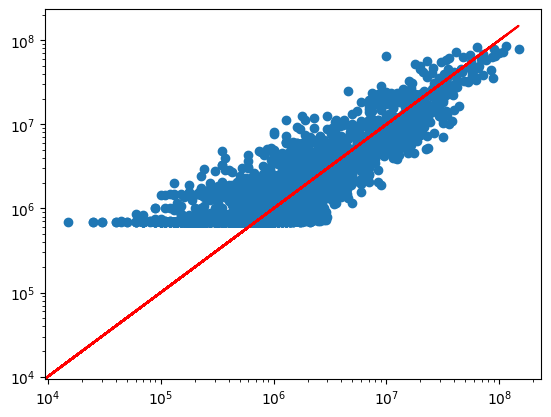

Decomposition for observation L. Messi


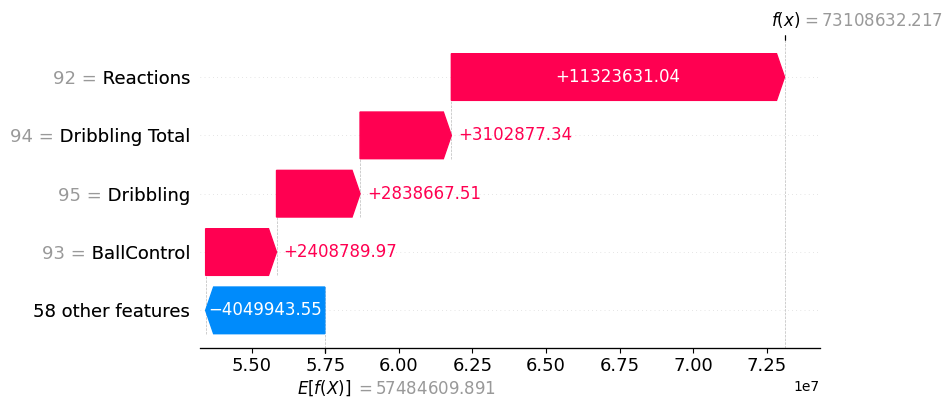

Decomposition for observation T. Courtois


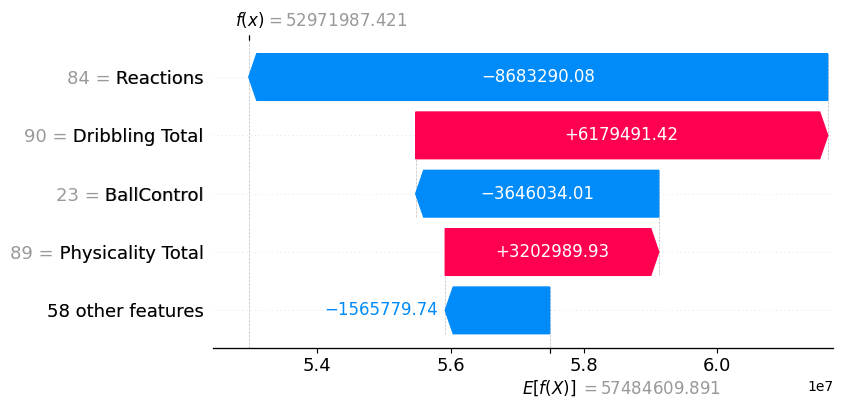

In [23]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))
explainer = shap.Explainer(regr.predict, X100)
shap_values = explainer(X100)

print("Scatter plot: predictions vs truth")
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
plt.yscale('log')
plt.xscale('log')
plt.show()

print('Decomposition for observation ' + name_1)
shap.plots.waterfall(shap_values[idx_1], max_display=5)

print('Decomposition for observation ' + name_2)
shap.plots.waterfall(shap_values[idx_2], max_display=5)

Second model is Catboost Regressor. The main idea of boosting is to sequentially combine many weak models and thus through greedy search create a strong competitive predictive model.

iteritems is deprecated and will be removed in a future version. Use .items instead.


Coefficient of determination: 0.83


iteritems is deprecated and will be removed in a future version. Use .items instead.


Scatter plot: predictions vs truth


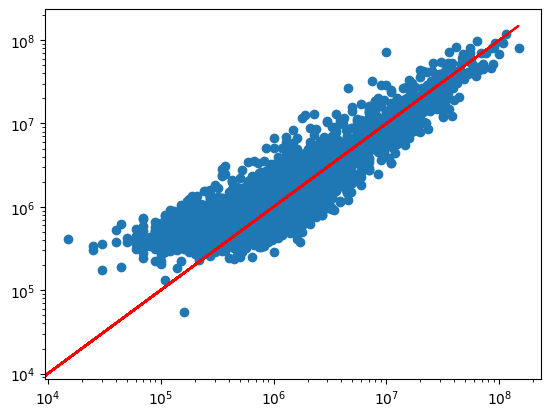

Decomposition for observation L. Messi


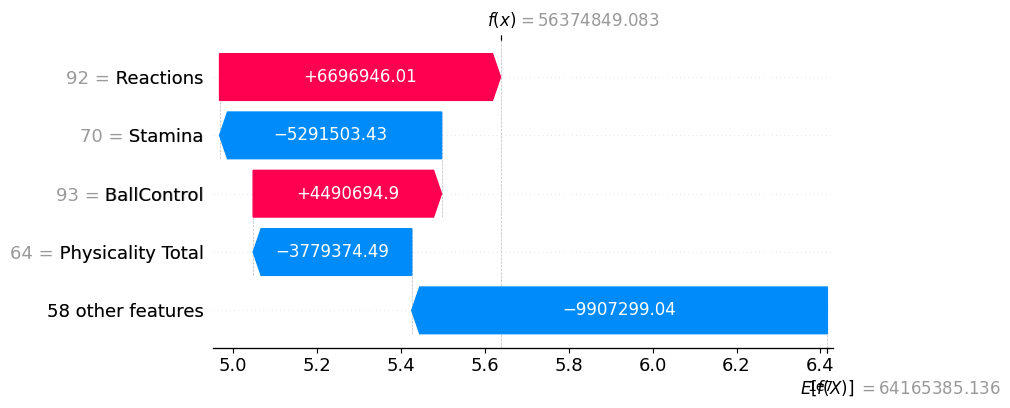

Decomposition for observation T. Courtois


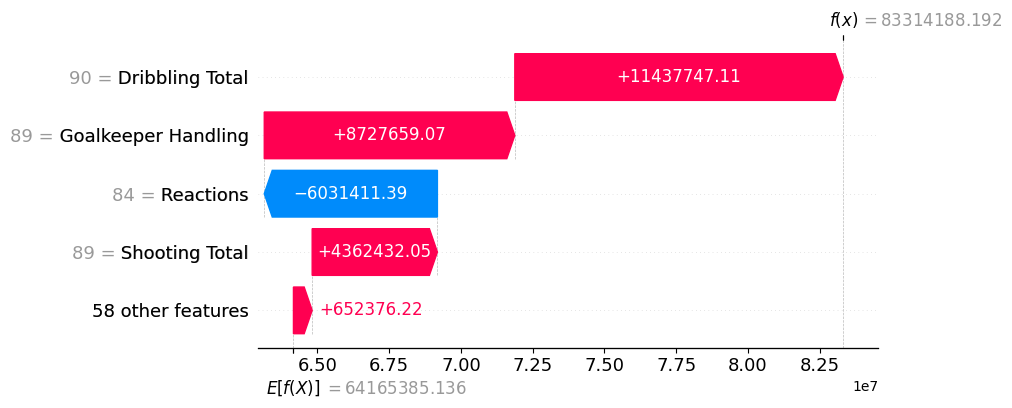

In [24]:
from catboost import CatBoostRegressor

regr = CatBoostRegressor(iterations=200, early_stopping_rounds=10, learning_rate=0.1, depth=5, verbose=False)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))
explainer = shap.Explainer(regr.predict, X100)
shap_values = explainer(X100)

print("Scatter plot: predictions vs truth")
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
plt.yscale('log')
plt.xscale('log')
plt.show()

print('Decomposition for observation ' + name_1)
shap.plots.waterfall(shap_values[idx_1], max_display=5)

print('Decomposition for observation ' + name_2)
shap.plots.waterfall(shap_values[idx_2], max_display=5)

MLP - multi-layer perceptron is a neural network that consists of at least 3 layers. One layer usually consist of a linear and an activation.

Coefficient of determination: 0.37


Permutation explainer: 101it [00:22,  2.28it/s]                         


Scatter plot: predictions vs truth


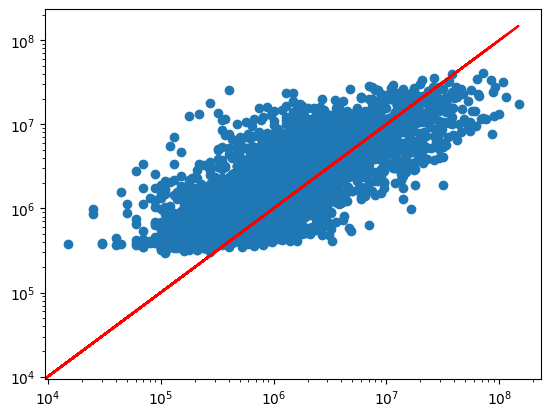

Decomposition for observation L. Messi


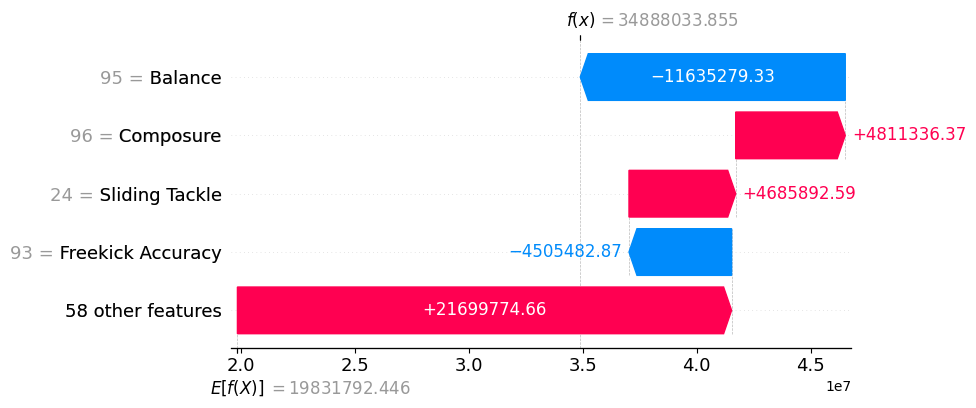

Decomposition for observation T. Courtois


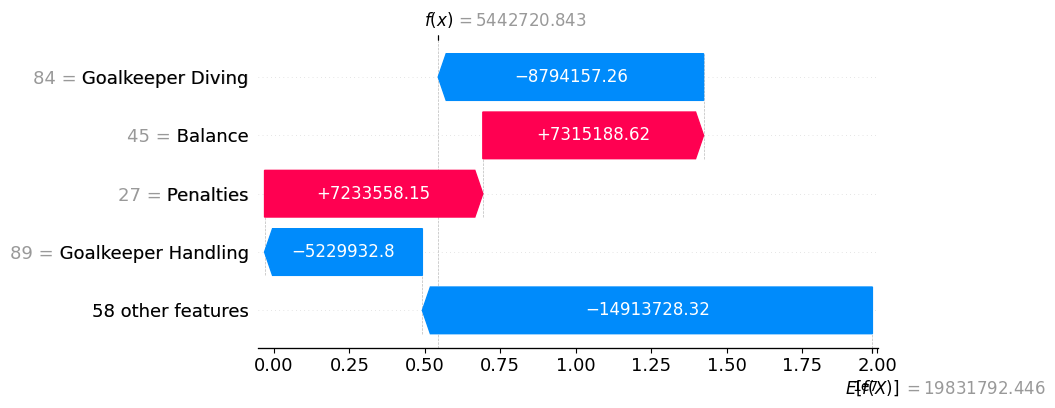

In [25]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000, early_stopping=True,
                    hidden_layer_sizes=(64, 128, 128, 64), learning_rate_init=0.001,
                    learning_rate='invscaling')
regr.fit(X_train.values, y_train)
y_pred = regr.predict(X_test.values)

print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))
explainer = shap.Explainer(regr.predict, X100.values)
shap_values = explainer(X100)


print("Scatter plot: predictions vs truth")
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
plt.yscale('log')
plt.xscale('log')
plt.show()

print('Decomposition for observation ' + name_1)
shap.plots.waterfall(shap_values[idx_1], max_display=5)

print('Decomposition for observation ' + name_2)
shap.plots.waterfall(shap_values[idx_2], max_display=5)

### 4.
As we can see these two observations have ave different variables of the highest importance.
Messi - 'Reactions', Courtois - 'Dribbling Total'.
### 5.
Variable 'Reactions' has positive influence on Messi's market value and negative for Courtois's market value.
### 6.
As we can see there are differences on variables importance on same observation between two presented models.
For example:
- Catboost claims that Goalkeeper Handling is important for Courtois's value (which is definitely true), but Random Forest do not.
- MLP claims that Goalkeeper Diving is the most important variable for Courtois but other models do not
    (Goalkeeper certainly should have good diving skills. The fact that only MLP (model that performs the worst) sees is interesting.)